#### 1. Set the variable test1 to the string &#39;This is a test of the emergency text system,&#39; and save test1 to a file named test.txt.

In [34]:
test1 = 'This is a test of the emergency text system,'
file = open('test.txt','w+')
file.write(test1)

44

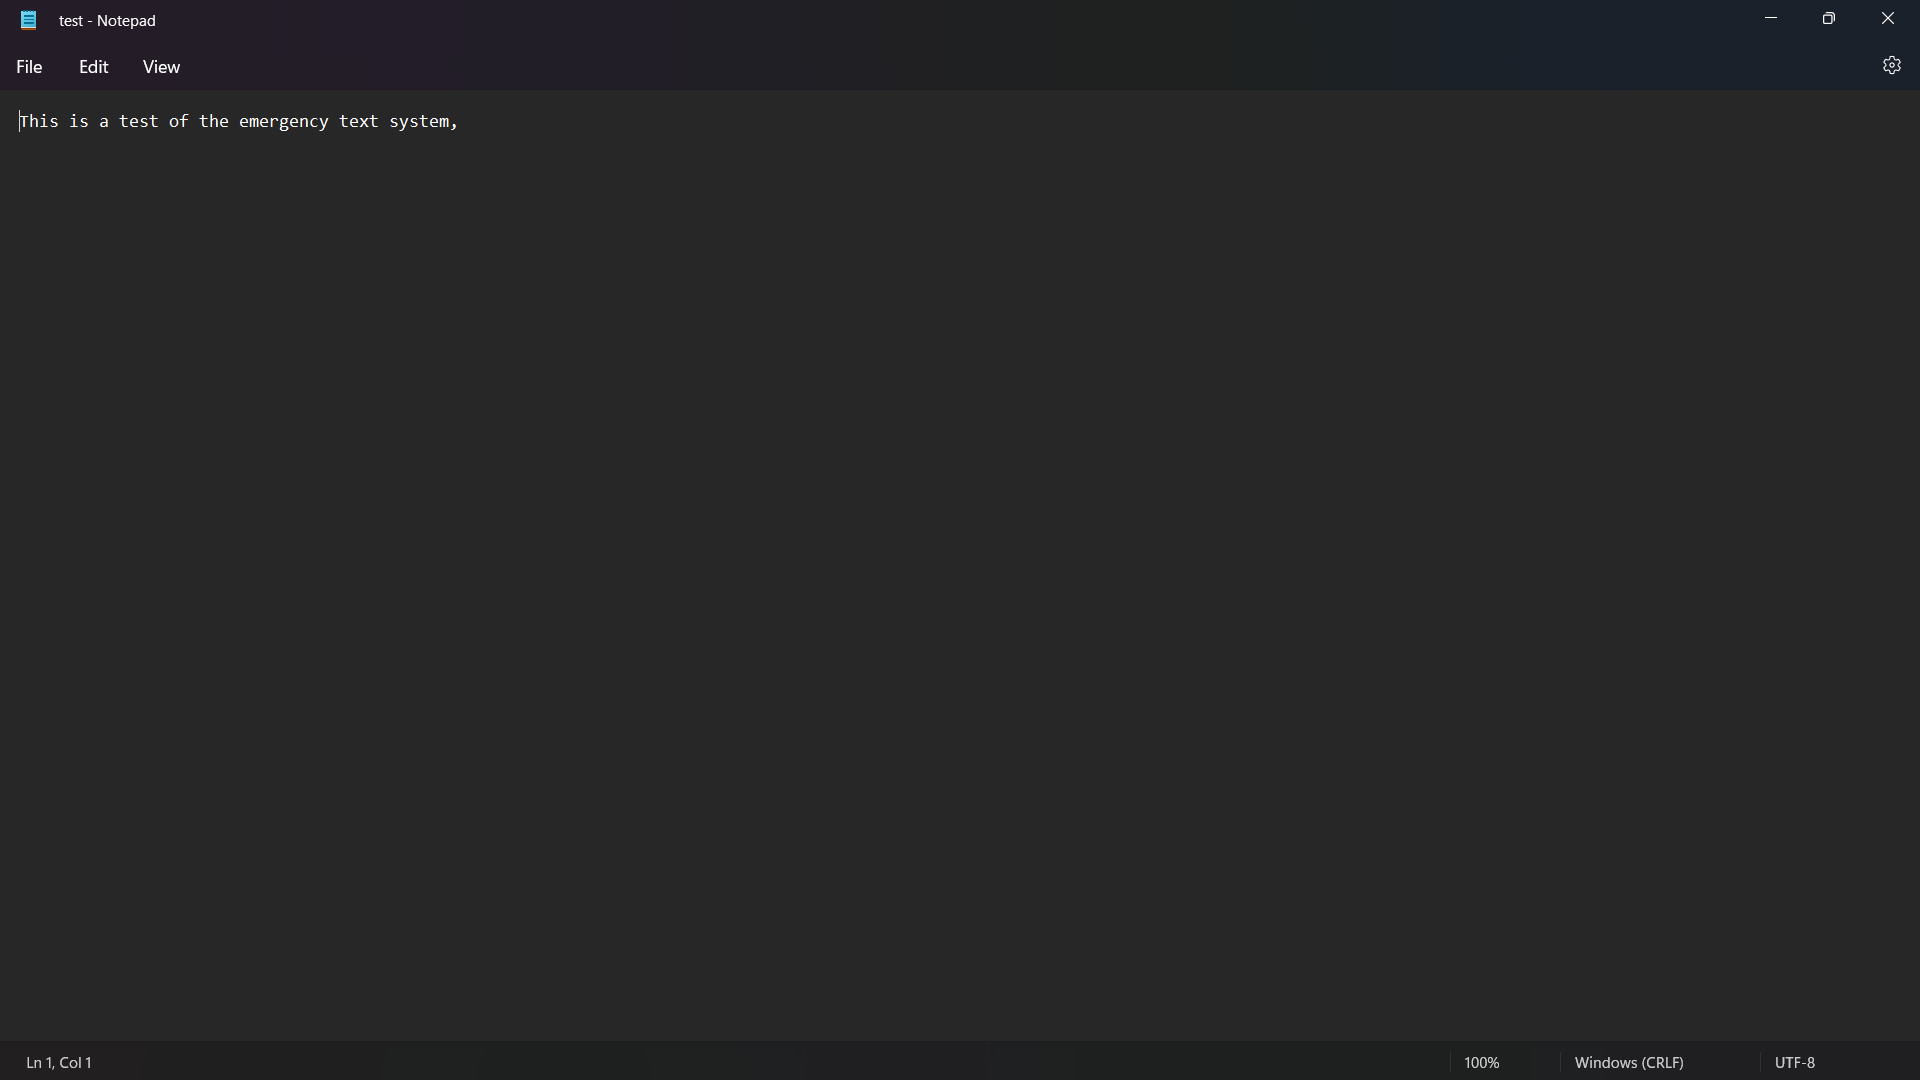

#### 2. Read the contents of the file test.txt into the variable test2. Is there a difference between test 1 and test 2?

In [35]:
file = open('test.txt','r')
file.seek(0)
test2=file.readline()
test2

'This is a test of the emergency text system,'

In [36]:
if test1==test2:
    print(f"both are same.({test1==test2})")

both are same.(True)


#### 3. Create a CSV file called books.csv by using these lines: 

####        title,author,year 
####        The Weirdstone of Brisingamen,Alan Garner,1960 
####         Perdido Street Station,China Miéville,2000 
####         Thud!,Terry Pratchett,2005 
#####         The Spellman Files,Lisa Lutz,2007 
####         Small Gods,Terry Pratchett,1992

In [ ]:
import csv
rows =[ 
    ['title','author','year'],
    ['The Weirdstone of Brisingamen','Alan Garner',1960],
    ['Perdido Street Station','China Miéville',2000],
    ['Thud!','Terry Pratchett',2005],
    ['The Spellman Files','Lisa Lutz',2007],
    ['Small Gods','Terry Pratchett',1992]]
with open('books.csv','w',newline='')as file:
    writer = csv.writer(file)
    writer.writerows(rows)

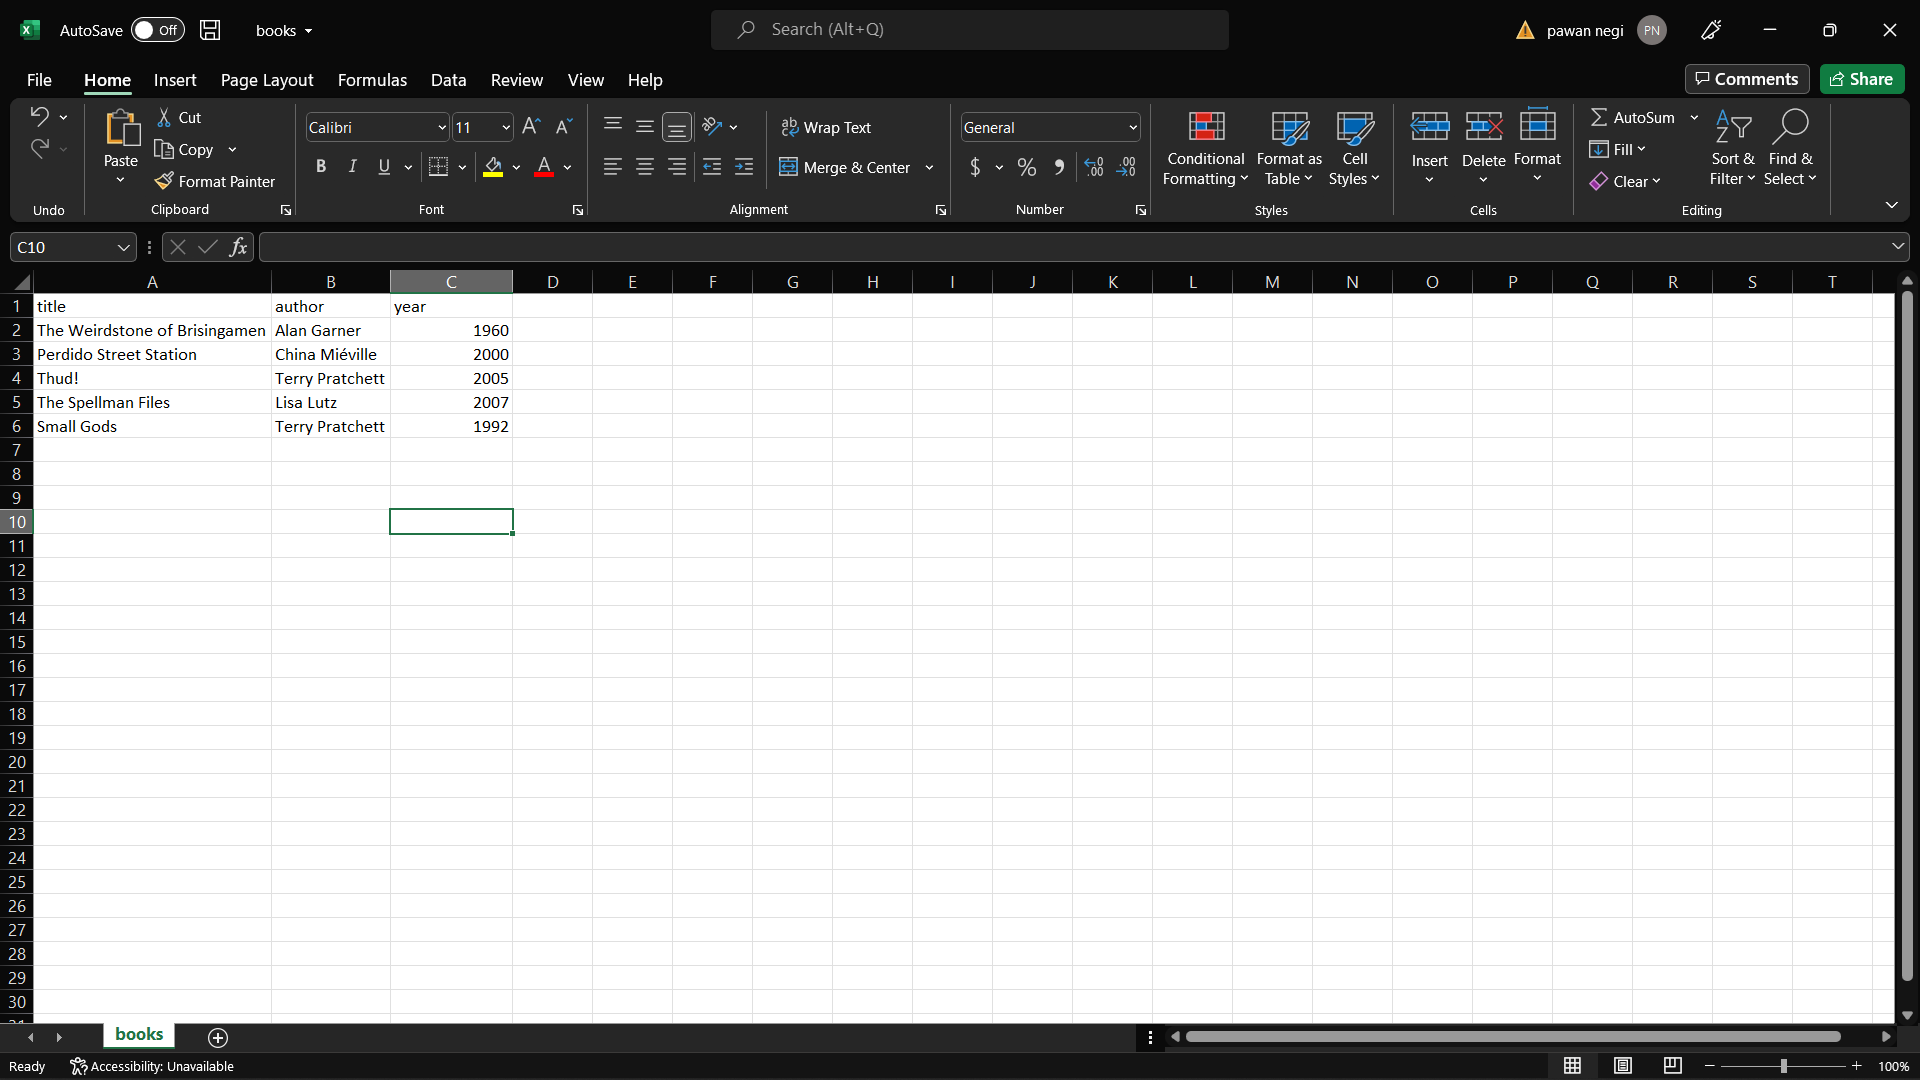

#### 4. Use the sqlite3 module to create a SQLite database called books.db, and a table called books with these fields: title (text), author (text), and year (integer).

In [ ]:
import sqlite3
conn = sqlite3.connect('books.db')
cursor = conn.cursor()
cursor.execute('create table books(title varchar(20),author varchar(20), year int)')
conn.commit()

#### 5. Read books.csv and insert its data into the book table.

In [7]:
import pandas as pd
read_books = pd.read_csv('books.csv',encoding='unicode_escape')
read_books.to_sql('books', conn, if_exists='append', index = False)

5

In [9]:
read_books

,title,author,year
0,The Weirdstone of Brisingamen,Alan Garner,1960
1,Perdido Street Station,China Miéville,2000
2,Thud!,Terry Pratchett,2005
3,The Spellman Files,Lisa Lutz,2007
4,Small Gods,Terry Pratchett,1992


#### 6. Select and print the title column from the book table in alphabetical order.

In [13]:
cursor.execute('select title from books order by title asc')
print(cursor.fetchall())

[('Perdido Street Station',), ('Small Gods',), ('The Spellman Files',), ('The Weirdstone of Brisingamen',), ('Thud!',)]


#### 7. From the book table, select and print all columns in the order of publication.


In [24]:
cursor.execute('select title, author,year from books order by year')
all_col=pd.DataFrame(cursor.fetchall(),columns=['title','author','year'])
all_col

,title,author,year
0,The Weirdstone of Brisingamen,Alan Garner,1960
1,Small Gods,Terry Pratchett,1992
2,Perdido Street Station,China Miéville,2000
3,Thud!,Terry Pratchett,2005
4,The Spellman Files,Lisa Lutz,2007


#### 8. Use the sqlalchemy module to connect to the sqlite3 database books.db that you just made in exercise 6.

In [21]:
!pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import sqlalchemy as db

engine = db.create_engine("sqlite:///books.db")
rows = engine.execute('select * from books')
for i in rows:
    print(i)

('The Weirdstone of Brisingamen', 'Alan Garner', 1960)
('Perdido Street Station', 'China Miéville', 2000)
('Thud!', 'Terry Pratchett', 2005)
('The Spellman Files', 'Lisa Lutz', 2007)
('Small Gods', 'Terry Pratchett', 1992)


#### 9. Install the Redis server and the Python redis library (pip install redis) on your computer. Create a Redis hash called test with the fields count (1) and name (&#39;Fester Bestertester&#39;). Print all the fields for test.

In [27]:
!pip install redis

  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)


In [ ]:
import redis
conn = redis.Redis()
conn.delete('test')
conn.hmset('test', {'count': 1, 'name': 'Fester Bestertester'})
conn.hgetall('test')

#### 10. Increment the count field of test and print it.

In [ ]:
conn.hincrby('test','count', 3)